## Non-Linear Dimensionality Reduction
**Using Gray Scale Images WxH = 40 X 30**</p>
**Using Sum of Y and then Sum of Y and X**</p>


In [1]:
#import umap
import umap.umap_ as umap


In [2]:
import numpy as np
import pandas as pd
import datashader as ds
import datashader.utils as utils
import datashader.transfer_functions as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#this is the grayscale
source_df = pd.read_csv('histy_train.csv')

In [4]:
#this is the grayscale
source_df2 = pd.read_csv('histx_train.csv')

In [5]:
hog_df = pd.read_csv('hog_fd_train.csv')

In [6]:
hog_df.head()

,label,fd_value0,fd_value1,fd_value2,fd_value3,fd_value4,fd_value5,fd_value6,fd_value7,fd_value8,...,fd_value1718,fd_value1719,fd_value1720,fd_value1721,fd_value1722,fd_value1723,fd_value1724,fd_value1725,fd_value1726,fd_value1727
0,0.0,0.016479,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.705982,...,0.0,0.37049,0.002554,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,1.000000,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,0.000000,0.0,0.0,0.004507,0.005494,0.0,0.0,0.0,0.000000,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
source_df.head()

,label,sum_y_0,sum_y_1,sum_y_2,sum_y_3,sum_y_4,sum_y_5,sum_y_6,sum_y_7,sum_y_8,...,sum_y_30,sum_y_31,sum_y_32,sum_y_33,sum_y_34,sum_y_35,sum_y_36,sum_y_37,sum_y_38,sum_y_39
0,0,7500,7500,7500,7500,7500,5000,4750,4750,4750,...,5500,5750,6000,6000,6000,6250,6250,6000,7000,7500
1,2,7500,7500,7500,7500,7500,7500,7500,7500,7500,...,7500,7500,7500,7500,7500,7500,7500,7500,7500,7500
2,2,7500,7500,7500,5500,5500,5500,5500,5500,5500,...,5500,5500,5500,5500,5500,5500,5500,5500,7500,7500
3,3,7500,7500,7500,7500,7500,7250,7250,7250,7000,...,7500,7500,7500,7500,7500,7500,7500,7500,7500,7500
4,1,7500,7250,6250,6500,6500,6250,6500,6250,6250,...,4250,4000,4500,5500,6250,6000,6250,6000,6500,6750


In [8]:
source_df2.head()

,label,sum_x_0,sum_x_1,sum_x_2,sum_x_3,sum_x_4,sum_x_5,sum_x_6,sum_x_7,sum_x_8,...,sum_x_20,sum_x_21,sum_x_22,sum_x_23,sum_x_24,sum_x_25,sum_x_26,sum_x_27,sum_x_28,sum_x_29
0,0,10000,10000,10000,10000,10000,10000,10000,10000,10000,...,2750,7250,10000,10000,10000,10000,10000,10000,10000,10000
1,2,10000,10000,10000,10000,10000,10000,10000,10000,10000,...,6750,9250,10000,10000,10000,10000,10000,10000,10000,10000
2,2,10000,10000,10000,10000,10000,10000,10000,10000,8500,...,8000,8500,10000,10000,10000,10000,10000,10000,10000,10000
3,3,10000,10000,10000,7500,5750,6000,6000,6250,6250,...,8250,8250,8500,8750,8750,9000,9500,10000,10000,10000
4,1,10000,10000,10000,10000,10000,10000,10000,7000,5500,...,5250,5750,7750,9500,10000,10000,10000,10000,10000,10000


In [9]:
source_df.shape, source_df2.shape

((3377, 41), (3377, 31))

**Try SUM Y Vector**

In [10]:
final_df = source_df

In [11]:
final_df.shape

(3377, 41)

In [12]:

#data = source_df.iloc[:, :source_df.shape[1]].values.astype(np.float32)
data = final_df.iloc[:, 1:].values.astype(np.float32)


In [13]:
#target = source_df['class'].values
target = final_df['label'].values

In [14]:
data.shape, target.shape

((3377, 40), (3377,))

In [15]:
label_key = {
    "Pants": 0, 
    "Tshirts":1,
    "Watches":2, 
    "Casual Shoes":3 
 
}

In [16]:
color_key = {
    "0": "#FF0000",  # Bright Red, Pants
    "1": "#00FF00",  # Bright Green, T-shirts
    "2": "#0000FF",  # Bright Blue, Watches
    "3": "#FFFF00",  # Bright Yellow, Casual Shoes

}

## UMAP Mapping and Visualization with Sum Y Only

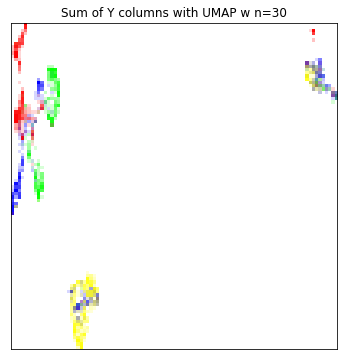

In [21]:
# Initialize UMAP
reducer = umap.UMAP(n_neighbors = 30, random_state=42)
#reducer = umap(random_state=42)


# Fit and transform the data
embedding = reducer.fit_transform(data)

# Prepare the data for visualization
df = pd.DataFrame(embedding, columns=('x', 'y'))

df['class'] = pd.Series([str(x) for x in target], dtype="category")

# Visualize the data using datashader

cvs = ds.Canvas(plot_width=100, plot_height=100)
agg = cvs.points(df, 'x', 'y', ds.count_cat('class'))
img = tf.shade(agg, color_key=color_key, how='eq_hist')
utils.export_image(img, filename='gray_small_histy_30', background='white')

# Display the image
image = plt.imread('gray_small_histy_30.png')
fig, ax = plt.subplots(figsize=(6, 6))
plt.imshow(image)
plt.setp(ax, xticks=[], yticks=[])
plt.title("Sum of Y columns with UMAP w n=30", fontsize=12)
plt.show()




### With Sum of X and Y

In [22]:
final2_df = pd.concat([source_df, source_df2.iloc[:,1:]], axis=1)

In [23]:
#data = source_df.iloc[:, :source_df.shape[1]].values.astype(np.float32)
data2 = final2_df.iloc[:, 1:].values.astype(np.float32)
target2 = final2_df['label'].values


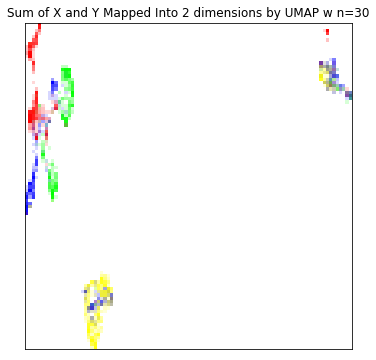

In [24]:
# Initialize UMAP
reducer2 = umap.UMAP(n_neighbors = 30, random_state=42)
#reducer = umap(random_state=42)


# Fit and transform the data
embedding2 = reducer2.fit_transform(data2)

# Prepare the data for visualization
df = pd.DataFrame(embedding, columns=('x', 'y'))

df['class'] = pd.Series([str(x) for x in target2], dtype="category")

# Visualize the data using datashader

cvs = ds.Canvas(plot_width=100, plot_height=100)
agg = cvs.points(df, 'x', 'y', ds.count_cat('class'))
img = tf.shade(agg, color_key=color_key, how='eq_hist')
utils.export_image(img, filename='gray_small_histxy_30', background='white')

# Display the image
image = plt.imread('gray_small_histxy_30.png')
fig, ax = plt.subplots(figsize=(6, 6))
plt.imshow(image)
plt.setp(ax, xticks=[], yticks=[])
plt.title("Sum of X and Y Mapped Into 2 dimensions by UMAP w n=30", fontsize=12)
plt.show()




**The above results suggest that sum of x and y alone are not sufficient to seperate classes**

### Lets mix grayscale data with Sum of X and Y

In [25]:
#this is the grayscale
grayscale_df = pd.read_csv('gray_small_train_set.csv')

In [26]:
final3_df = pd.concat([grayscale_df,  source_df.iloc[:,1:], source_df2.iloc[:,1:]], axis=1)



In [27]:
final3_df.shape, grayscale_df.shape, source_df.shape, source_df2.shape

((3377, 1271), (3377, 1201), (3377, 41), (3377, 31))

In [28]:

#data = source_df.iloc[:, :source_df.shape[1]].values.astype(np.float32)
data3 = final3_df.iloc[:, 1:].values.astype(np.float32)
target3 = final3_df['label'].values

## UMAP Mapping with Sum X,Y and Gray Images

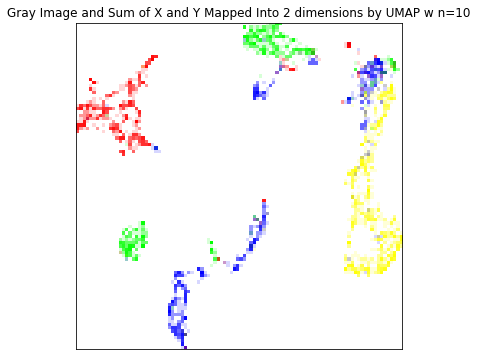

In [103]:
# Initialize UMAP
reducer3 = umap.UMAP(n_neighbors = 30, n_components=2, random_state=42)
#reducer = umap(random_state=42)


# Fit and transform the data
embedding3 = reducer3.fit_transform(data3)

# Prepare the data for visualization
df = pd.DataFrame(embedding3, columns=('x', 'y'))

df['class'] = pd.Series([str(x) for x in target3], dtype="category")

# Visualize the data using datashader

cvs = ds.Canvas(plot_width=100, plot_height=100)
agg = cvs.points(df, 'x', 'y', ds.count_cat('class'))
img = tf.shade(agg, color_key=color_key, how='eq_hist')
utils.export_image(img, filename='gray_img_small_histxy_30', background='white')

# Display the image
image = plt.imread('gray_img_small_histxy_30.png')
fig, ax = plt.subplots(figsize=(6, 6))
plt.imshow(image)
plt.setp(ax, xticks=[], yticks=[])
plt.title("Gray Image and Sum of X and Y Mapped Into 2 dimensions by UMAP w n=30", fontsize=12)
plt.show()




## Lets try with HOG data 

In [32]:
final4_df = pd.concat([grayscale_df,  hog_df.iloc[:,1:], source_df.iloc[:,1:], source_df2.iloc[:,1:]], axis=1)

In [33]:
final4_df.shape, grayscale_df.shape, hog_df.shape, source_df.shape, source_df2.shape

((3377, 2999), (3377, 1201), (3377, 1729), (3377, 41), (3377, 31))

In [34]:

#data = source_df.iloc[:, :source_df.shape[1]].values.astype(np.float32)
data4 = final4_df.iloc[:, 1:].values.astype(np.float32)
target4 = final4_df['label'].values

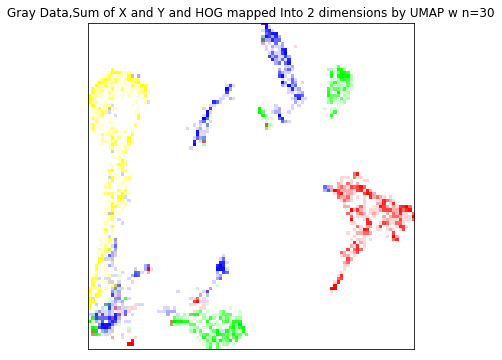

In [35]:
# Initialize UMAP
reducer4 = umap.UMAP(n_neighbors = 30, random_state=42)
#reducer = umap(random_state=42)


# Fit and transform the data
embedding4 = reducer4.fit_transform(data4)

# Prepare the data for visualization
df = pd.DataFrame(embedding4, columns=('x', 'y'))

df['class'] = pd.Series([str(x) for x in target4], dtype="category")

# Visualize the data using datashader

cvs = ds.Canvas(plot_width=100, plot_height=100)
agg = cvs.points(df, 'x', 'y', ds.count_cat('class'))
img = tf.shade(agg, color_key=color_key, how='eq_hist')
utils.export_image(img, filename='gray_small_histxy_hog_30', background='white')

# Display the image
image = plt.imread('gray_small_histxy_hog_30.png')
fig, ax = plt.subplots(figsize=(6, 6))
plt.imshow(image)
plt.setp(ax, xticks=[], yticks=[])
plt.title("Gray Data,Sum of X and Y and HOG mapped Into 2 dimensions by UMAP w n=30", fontsize=12)
plt.show()




In [134]:
# Ensure target is a 2D array with shape (3377, 1)
targetn = target4[:, np.newaxis]

# Concatenate along the second axis
emb_target = np.concatenate((targetn, embedding4), axis=1)

column_names = ['label','embedding x', 'embedding y']
embedding_df = pd.DataFrame( emb_target, columns=column_names)
embedding_df.head()

embedding_df.to_csv('umap_train_gray_small_hog_xy_2d.csv', index=False, header=True)  

In [135]:
# Save the trained model
import joblib
joblib.dump(reducer4, 'umap_model_gray_small_hog_xy_2d.pkl')


['umap_model_gray_small_hog_xy_2d.pkl']

### HOG and SumXY Only

In [43]:
color_key2 = {
    "0.0": "#FF0000",  # Bright Red, Pants
    "1.0": "#00FF00",  # Bright Green, T-shirts
    "2.0": "#0000FF",  # Bright Blue, Watches
    "3.0": "#FFFF00",  # Bright Yellow, Casual Shoes

}

In [39]:
final5_df = pd.concat([hog_df, source_df.iloc[:,1:], source_df2.iloc[:,1:]], axis=1)
final5_df.shape,  hog_df.shape, source_df.shape, source_df2.shape


((3377, 1799), (3377, 1729), (3377, 41), (3377, 31))

In [40]:

#data = source_df.iloc[:, :source_df.shape[1]].values.astype(np.float32)
data5 = final5_df.iloc[:, 1:].values.astype(np.float32)
target5 = final5_df['label'].values

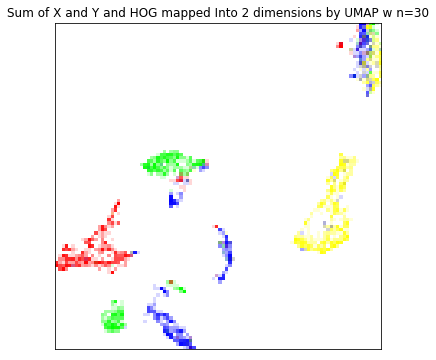

In [44]:
# Initialize UMAP
reducer5 = umap.UMAP(n_neighbors = 30, random_state=42)
#reducer = umap(random_state=42)


# Fit and transform the data
embedding5 = reducer4.fit_transform(data5)

# Prepare the data for visualization
df = pd.DataFrame(embedding5, columns=('x', 'y'))

df['class'] = pd.Series([str(x) for x in target5], dtype="category")

# Visualize the data using datashader

cvs = ds.Canvas(plot_width=100, plot_height=100)
agg = cvs.points(df, 'x', 'y', ds.count_cat('class'))
img = tf.shade(agg, color_key=color_key2, how='eq_hist')
utils.export_image(img, filename='histxy_hog_30', background='white')

# Display the image
image = plt.imread('histxy_hog_30.png')
fig, ax = plt.subplots(figsize=(6, 6))
plt.imshow(image)
plt.setp(ax, xticks=[], yticks=[])
plt.title("Sum of X and Y and HOG mapped Into 2 dimensions by UMAP w n=30", fontsize=12)
plt.show()




**The Mapping above does not show a clear seperation of clusters**